<a href="https://colab.research.google.com/github/rakshithaelango/Rain_Fall_Prediction/blob/main/Rain_Fall_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Rain Fall Prediction**

## **Problem Statement :** 


Rainfall detection is one of the most important real-life problems. Weather plays a crucial role in the whole agricultural process. It is not that easy to predict the course of weather accurately and here is where Machine Learning come to play. 

**Importing Packages**

In [30]:
# Importing packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression


**Loading DataSet**

In [2]:
# Load DataSet
df = pd.read_csv('/content/rainfall in india 1901-2015.csv')

**Exploring DataSet**

In [3]:
# first 5 rows
df.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [4]:
# last 5 rows
df.tail()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
4111,LAKSHADWEEP,2011,5.1,2.8,3.1,85.9,107.2,153.6,350.2,254.0,255.2,117.4,184.3,14.9,1533.7,7.9,196.2,1013.0,316.6
4112,LAKSHADWEEP,2012,19.2,0.1,1.6,76.8,21.2,327.0,231.5,381.2,179.8,145.9,12.4,8.8,1405.5,19.3,99.6,1119.5,167.1
4113,LAKSHADWEEP,2013,26.2,34.4,37.5,5.3,88.3,426.2,296.4,154.4,180.0,72.8,78.1,26.7,1426.3,60.6,131.1,1057.0,177.6
4114,LAKSHADWEEP,2014,53.2,16.1,4.4,14.9,57.4,244.1,116.1,466.1,132.2,169.2,59.0,62.3,1395.0,69.3,76.7,958.5,290.5
4115,LAKSHADWEEP,2015,2.2,0.5,3.7,87.1,133.1,296.6,257.5,146.4,160.4,165.4,231.0,159.0,1642.9,2.7,223.9,860.9,555.4


In [5]:
# no of rows and columns
df.shape

(4116, 19)

In [6]:
# columns names 
df.columns

Index(['SUBDIVISION', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL', 'Jan-Feb', 'Mar-May',
       'Jun-Sep', 'Oct-Dec'],
      dtype='object')

In [7]:
# overall information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4116 entries, 0 to 4115
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBDIVISION  4116 non-null   object 
 1   YEAR         4116 non-null   int64  
 2   JAN          4112 non-null   float64
 3   FEB          4113 non-null   float64
 4   MAR          4110 non-null   float64
 5   APR          4112 non-null   float64
 6   MAY          4113 non-null   float64
 7   JUN          4111 non-null   float64
 8   JUL          4109 non-null   float64
 9   AUG          4112 non-null   float64
 10  SEP          4110 non-null   float64
 11  OCT          4109 non-null   float64
 12  NOV          4105 non-null   float64
 13  DEC          4106 non-null   float64
 14  ANNUAL       4090 non-null   float64
 15  Jan-Feb      4110 non-null   float64
 16  Mar-May      4107 non-null   float64
 17  Jun-Sep      4106 non-null   float64
 18  Oct-Dec      4103 non-null   float64
dtypes: flo

**Data Cleaning**

In [8]:
df.dtypes

SUBDIVISION     object
YEAR             int64
JAN            float64
FEB            float64
MAR            float64
APR            float64
MAY            float64
JUN            float64
JUL            float64
AUG            float64
SEP            float64
OCT            float64
NOV            float64
DEC            float64
ANNUAL         float64
Jan-Feb        float64
Mar-May        float64
Jun-Sep        float64
Oct-Dec        float64
dtype: object

In [9]:
# no of missing values present 
df.isnull().sum()

SUBDIVISION     0
YEAR            0
JAN             4
FEB             3
MAR             6
APR             4
MAY             3
JUN             5
JUL             7
AUG             4
SEP             6
OCT             7
NOV            11
DEC            10
ANNUAL         26
Jan-Feb         6
Mar-May         9
Jun-Sep        10
Oct-Dec        13
dtype: int64

The above result show yes it present so we can replace the missing values into 0

In [10]:
# replacing missing values into 0 
df.fillna(value = 0,inplace =True)

In [11]:
# after replacing the values 
df.isnull().sum()

SUBDIVISION    0
YEAR           0
JAN            0
FEB            0
MAR            0
APR            0
MAY            0
JUN            0
JUL            0
AUG            0
SEP            0
OCT            0
NOV            0
DEC            0
ANNUAL         0
Jan-Feb        0
Mar-May        0
Jun-Sep        0
Oct-Dec        0
dtype: int64

Now the result shows equal 

In [12]:
df.loc[21]

SUBDIVISION    ANDAMAN & NICOBAR ISLANDS
YEAR                                1923
JAN                                 79.5
FEB                                  0.0
MAR                                  0.0
APR                                 91.3
MAY                                293.5
JUN                                808.4
JUL                                636.9
AUG                                182.2
SEP                                560.5
OCT                                131.9
NOV                                197.4
DEC                                 70.6
ANNUAL                               0.0
Jan-Feb                             79.5
Mar-May                              0.0
Jun-Sep                           2188.0
Oct-Dec                            399.9
Name: 21, dtype: object

In [13]:
grouped = df.groupby(df.SUBDIVISION)
TN = grouped.get_group("TAMIL NADU")

In [14]:
TN.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
3427,TAMIL NADU,1901,24.5,39.1,21.7,36.0,74.0,41.8,49.3,67.9,191.1,122.3,212.3,80.4,960.3,63.6,131.6,350.1,415.0
3428,TAMIL NADU,1902,67.2,9.8,25.1,21.9,84.7,39.3,55.1,113.8,98.6,282.2,174.9,165.8,1138.2,77.0,131.7,306.7,622.9
3429,TAMIL NADU,1903,19.3,7.8,1.7,18.2,128.5,58.5,72.6,115.0,210.4,128.1,200.5,203.2,1163.9,27.1,148.4,456.5,531.9
3430,TAMIL NADU,1904,35.2,0.1,0.7,19.5,121.9,34.9,89.0,40.4,85.7,163.2,23.6,49.1,663.1,35.3,142.1,249.9,235.8
3431,TAMIL NADU,1905,6.5,7.5,17.2,64.8,83.7,49.8,39.0,101.8,73.5,250.4,123.7,3.2,821.1,14.0,165.7,264.1,377.2


In [15]:
TN.tail()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
3537,TAMIL NADU,2011,4.3,11.2,8.0,91.5,33.4,56.0,45.5,128.9,76.0,200.4,230.5,41.0,926.5,15.5,132.8,306.4,471.8
3538,TAMIL NADU,2012,3.0,0.1,2.5,35.5,41.9,30.1,46.5,98.0,84.9,235.2,44.5,14.0,636.1,3.1,79.9,259.5,293.6
3539,TAMIL NADU,2013,3.9,30.9,30.0,20.3,42.0,54.6,42.7,110.7,113.5,127.9,112.3,53.2,741.9,34.8,92.2,321.5,293.4
3540,TAMIL NADU,2014,7.4,6.1,8.1,8.3,139.1,47.8,50.6,117.7,98.9,252.2,110.8,66.0,913.0,13.4,155.5,315.1,428.9
3541,TAMIL NADU,2015,8.3,2.3,21.7,108.8,112.4,62.4,43.5,81.6,98.4,132.6,379.8,152.8,1204.6,10.6,242.8,285.9,665.3


**Visualizing data **

array([[<Axes: title={'center': 'YEAR'}>,
        <Axes: title={'center': 'JAN'}>, <Axes: title={'center': 'FEB'}>,
        <Axes: title={'center': 'MAR'}>],
       [<Axes: title={'center': 'APR'}>, <Axes: title={'center': 'MAY'}>,
        <Axes: title={'center': 'JUN'}>, <Axes: title={'center': 'JUL'}>],
       [<Axes: title={'center': 'AUG'}>, <Axes: title={'center': 'SEP'}>,
        <Axes: title={'center': 'OCT'}>, <Axes: title={'center': 'NOV'}>],
       [<Axes: title={'center': 'DEC'}>,
        <Axes: title={'center': 'ANNUAL'}>,
        <Axes: title={'center': 'Jan-Feb'}>,
        <Axes: title={'center': 'Mar-May'}>],
       [<Axes: title={'center': 'Jun-Sep'}>,
        <Axes: title={'center': 'Oct-Dec'}>, <Axes: >, <Axes: >]],
      dtype=object)

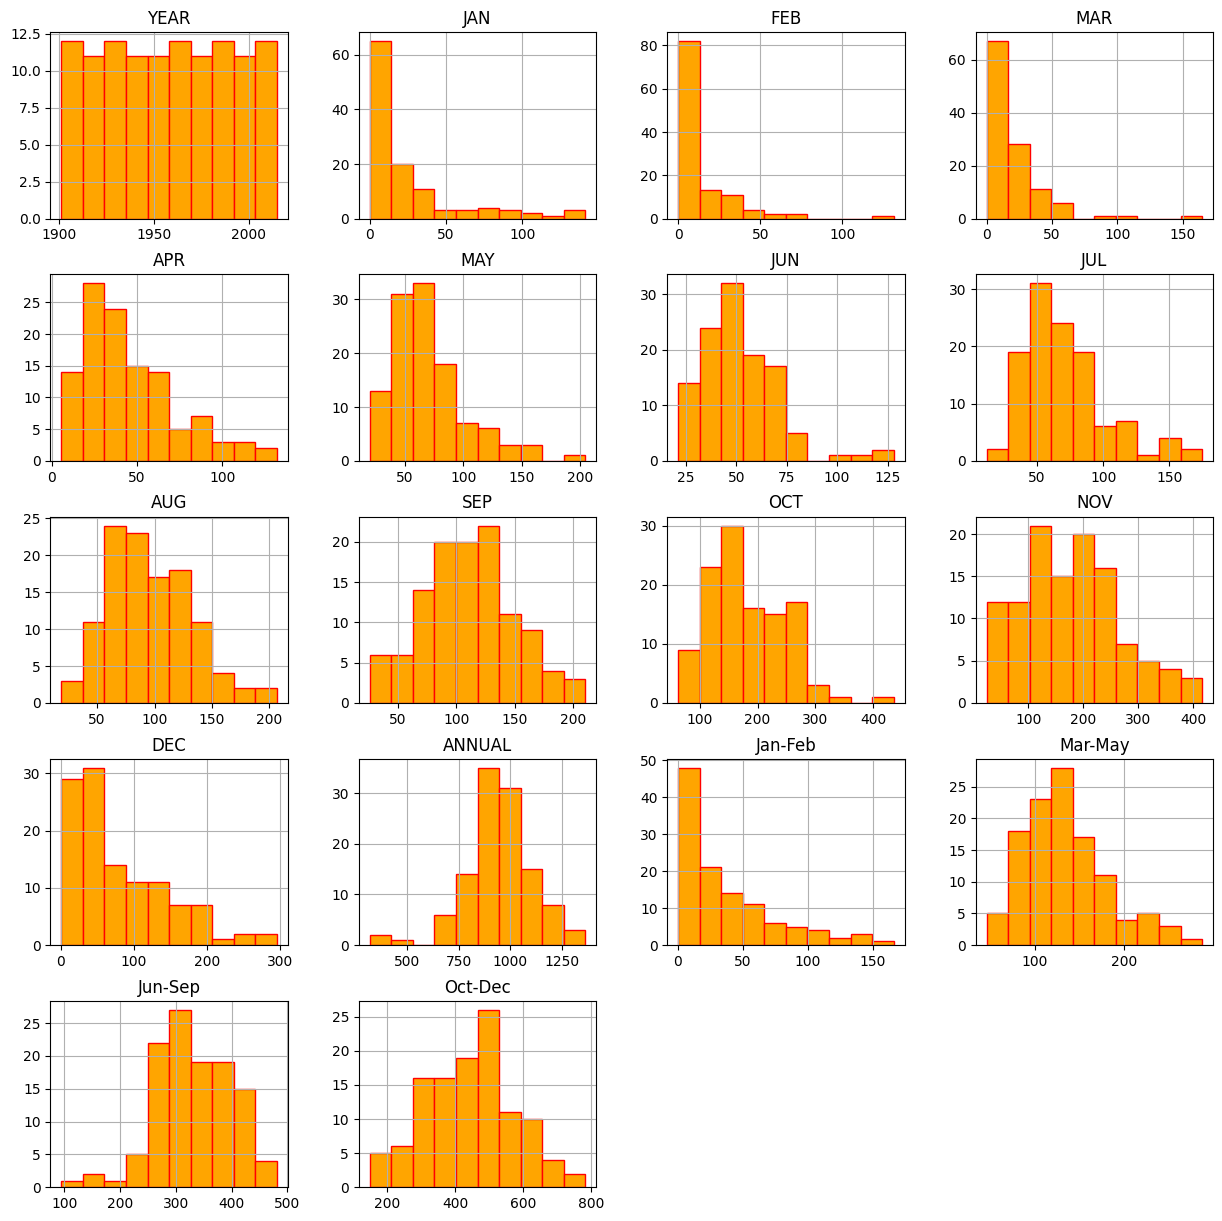

In [18]:
# histogram 
TN.hist(figsize=(15,15), color = 'orange', edgecolor='red')

In [19]:
data = np.asarray(TN[['FEB', 'MAR', 'APR','MAY']])
print(np.shape(data))
X = data[:,0:3]
y = data[:,3]

(115, 4)


In [20]:
data = np.asarray(TN[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']])
print(np.shape(data))

(115, 12)


In [23]:
X = None; y = None
for i in range(data.shape[1]-3):
    if X is None:
        X = data[:, i:i+3]
        y = data[:, i+3]
    else:
        X = np.concatenate((X, data[:, i:i+3]), axis=0)
        y = np.concatenate((y, data[:, i+3]), axis=0)

**Splitting the DataSet into Train / Test** 

In [24]:
# Splitting into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
np.shape(X_train)

(828, 3)

In [25]:
np.shape(X_test)

(207, 3)

In [33]:
np.shape(y_train)

(828,)

In [32]:
np.shape(y_test)

(207,)

**Model Building**

**1. Linear Regression**

In [26]:
linear_regressor = LinearRegression()  
linear_regressor.fit(X_train, y_train)  
Y_pred = linear_regressor.predict(X_test)  
mean_absolute_error(y_test, Y_pred)

46.89449574289162

**2. RandomForest Regression**

In [27]:
rf = RandomForestRegressor(n_estimators = 100, max_depth=10, n_jobs=1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
mean_absolute_error(y_test, y_pred)

45.16490401976896